In [1]:
from COBRAmodel import *   
from cobra.flux_analysis import flux_variability_analysis as fva

In [2]:
model = MyModel(r"C:\Users\gonca\Documents\GitHub\UC_projeto\model.xml", "e_Biomass__cytop")

Loading



3077 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


Reactions: 2684
Metabolites: 2225
Genes: 1312
Model loaded


In [5]:
model.test_reaction("RXN_18086__cytop")

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


,Flux
Oxygen,1000.000000
Methanesulfonic acid,0.941176
Reduced FMN,0.132231


In [5]:
ch4_range = [x / 1000 for x in range(0, 266, 10)]

In [7]:
import pandas as pd
results1 = {}
model.reactions.EX_C00697__extr.bounds = (-0.26, 1000)
model.reactions.EX_C20396__extr.bounds = (-0.26, 1000)

for ch4_production in ch4_range:
    model.reactions.EX_C01438__extr.bounds = (ch4_production, ch4_production)
    with model:
        model.objective = 'e_Biomass__cytop'
        solution = model.maximize(value=False, pfba=True)
        fva_sol = fva(model, ['DMSPL__cytop', 'CP_lyase__cytop', 'Rnitrogenase__chlo', 'Rfenton__cytop'], fraction_of_optimum=0.9, processes=4)
        print(f"CH4 production: {ch4_production} - Growth rate: {solution.fluxes.loc['e_Biomass__cytop']}")
        df = pd.concat([solution.fluxes.loc[['e_Biomass__cytop', 'CP_lyase__cytop', 'DMSPL__cytop', 'Rnitrogenase__chlo', 'Rfenton__cytop']], fva_sol], axis=1)
        results1[ch4_production] = df

CH4 production: 0.0 - Growth rate: 0.023632662013295305
CH4 production: 0.01 - Growth rate: 0.023706514082087154
CH4 production: 0.02 - Growth rate: 0.023780366150880215
CH4 production: 0.03 - Growth rate: 0.023854218219669907
CH4 production: 0.04 - Growth rate: 0.02392807028846112
CH4 production: 0.05 - Growth rate: 0.024001922357251213
CH4 production: 0.06 - Growth rate: 0.024075774426043858
CH4 production: 0.07 - Growth rate: 0.02414962649483539
CH4 production: 0.08 - Growth rate: 0.024209154142362514
CH4 production: 0.09 - Growth rate: 0.024209154142361473
CH4 production: 0.1 - Growth rate: 0.024209154142361997
CH4 production: 0.11 - Growth rate: 0.024209154142362157
CH4 production: 0.12 - Growth rate: 0.02420915414236197
CH4 production: 0.13 - Growth rate: 0.024209154142356356
CH4 production: 0.14 - Growth rate: 0.024209154142356356
CH4 production: 0.15 - Growth rate: 0.024209154142356356
CH4 production: 0.16 - Growth rate: 0.024209154142356
CH4 production: 0.17 - Growth rate: 0.0

In [8]:
results1

{0.0:                       fluxes  minimum  maximum
 e_Biomass__cytop    0.023633      NaN      NaN
 CP_lyase__cytop     0.000000      0.0      0.0
 DMSPL__cytop        0.000000      0.0      0.0
 Rnitrogenase__chlo  0.000000      0.0      0.0
 Rfenton__cytop      0.000000      0.0      0.0,
 0.01:                       fluxes  minimum  maximum
 e_Biomass__cytop    0.023707      NaN      NaN
 CP_lyase__cytop     0.000000      0.0     0.01
 DMSPL__cytop        0.000000      0.0     0.00
 Rnitrogenase__chlo  0.010000      0.0     0.01
 Rfenton__cytop      0.000000      0.0     0.00,
 0.02:                      fluxes       minimum       maximum
 e_Biomass__cytop    0.02378           NaN           NaN
 CP_lyase__cytop     0.00000  0.000000e+00  2.000000e-02
 DMSPL__cytop        0.00000  0.000000e+00  0.000000e+00
 Rnitrogenase__chlo  0.02000  0.000000e+00  2.000000e-02
 Rfenton__cytop      0.00000  2.843999e-18  2.843999e-18,
 0.03:                       fluxes  minimum  maximum
 e_Bioma

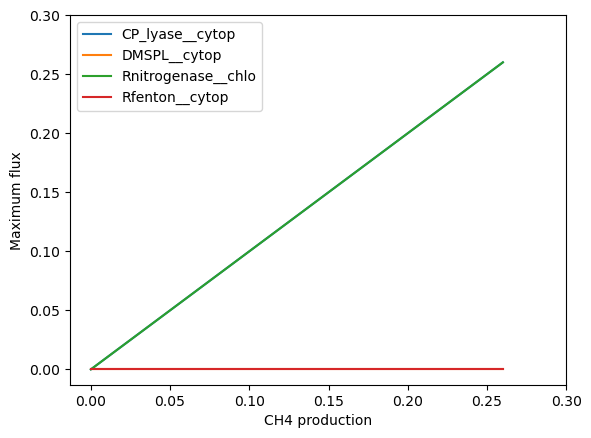

In [9]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(results1.keys(), [results1[key].loc[['CP_lyase__cytop','DMSPL__cytop', 'Rnitrogenase__chlo', 'Rfenton__cytop']].maximum for key in results1.keys()])

plt.yticks(np.arange(0, max([results1[key].maximum.max() for key in results1.keys()]) + 0.05, 0.05))
plt.xticks(np.arange(0, max(results1.keys()) + 0.05, 0.05))

plt.xlabel('CH4 production')
plt.ylabel('Maximum flux')
plt.legend(['CP_lyase__cytop','DMSPL__cytop', 'Rnitrogenase__chlo', 'Rfenton__cytop'])
plt.show()

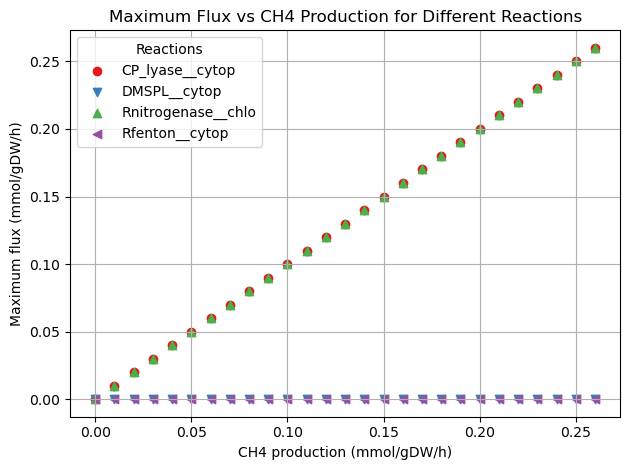

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = []
for key in results1.keys():
    for item in ['CP_lyase__cytop', 'DMSPL__cytop', 'Rnitrogenase__chlo', 'Rfenton__cytop']:
        data.append([key, item, results1[key].loc[item].maximum])
df = pd.DataFrame(data, columns=['CH4 production (mmol/gDW/h)', 'Reactions', 'Maximum Flux (mmol/gDW/h)'])


markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']


colors = plt.cm.Set1.colors


for i, reaction in enumerate(df['Reactions'].unique()):
    plt.scatter('CH4 production (mmol/gDW/h)', 'Maximum Flux (mmol/gDW/h)', data=df[df['Reactions'] == reaction], 
                marker=markers[i % len(markers)], color=colors[i])

plt.xlabel('CH4 production (mmol/gDW/h)')
plt.ylabel('Maximum flux (mmol/gDW/h)')
plt.title('Maximum Flux vs CH4 Production for Different Reactions')
plt.grid(True)

plt.legend(df['Reactions'].unique(), title='Reactions', loc='upper left')

plt.tight_layout()
plt.show()